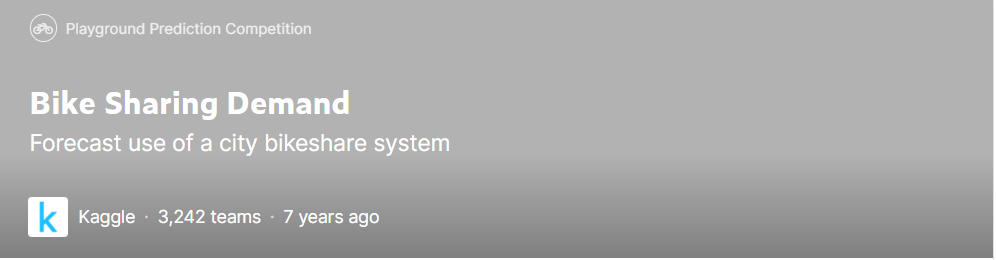
ref) https://www.kaggle.com/c/bike-sharing-demand

In [26]:
# eda ) train,test 분포도 이외에 train 데이터만 봐도 된다
# 가공) train,test 둘다 해야 함

In [27]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [28]:
submission=pd.read_csv('./sampleSubmission.csv')
test=pd.read_csv('./test.csv')
df=pd.read_csv('./train.csv')
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 0:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 1:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 2:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 3:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 4:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [30]:
df.shape

(10886, 12)

### train에만 있는 피쳐 삭제
* test는 타겟피쳐가 없기 때문에 train - 1개 피쳐를 갖는다

### train_test 합치기

In [31]:
df= df.drop(['casual', 'registered'], axis=1)
df.shape, test.shape

((10886, 10), (6493, 9))

In [32]:
df = pd.concat([df, test], axis=0)
df.shape

(17379, 10)

In [33]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011-01-01 0:00,1,0,0,1,9.84,14.395,81,0.0,16.0
1,2011-01-01 1:00,1,0,0,1,9.02,13.635,80,0.0,40.0
2,2011-01-01 2:00,1,0,0,1,9.02,13.635,80,0.0,32.0
3,2011-01-01 3:00,1,0,0,1,9.84,14.395,75,0.0,13.0
4,2011-01-01 4:00,1,0,0,1,9.84,14.395,75,0.0,1.0


이제 변수명을 train_test()으로 한다. 분리는 밑에서!

### train_test 분리

In [34]:
# train = train_test.iloc[:10886]
# test = train_test.iloc[10886:]
# test = test.drop(['count'], axis=1)
# train.shape, test.shape

In [35]:
# for df in [train,test]:
    

### 날짜타입 변환
- read: 날짜 타입으로 읽어오기
- astype : object > datetime64[ns] 
- to_datetime()

In [36]:
df['datetime']=pd.to_datetime(df['datetime'],format='%Y-%m-%d %H:%M:%S')
#test['datetime']=test['datetime'].apply(pd.to_datetime)

#datetime 타입에서 년,월,일,시간 추출
df['year']=df['datetime'].dt.year
df['month']=df['datetime'].dt.month
df['day']=df['datetime'].dt.day
df['hour']=df['datetime'].dt.hour
df['weekday']=df['datetime'].dt.dayofweek #0:월, 6:일

# test['year']=test['datetime'].dt.year
# test['month']=test['datetime'].dt.month
# test['day']=test['datetime'].dt.day
# test['hour']=test['datetime'].dt.hour

In [37]:
df.drop('datetime',axis=1,inplace=True)
#drop안하고 set_index함수 쓰는 것 가능,밖으로 꺼낼 땐 reset_index

### EDA
https://www.kaggle.com/viveksrinivasan/eda-ensemble-model-top-10-percentile

##### train test 분포도

In [38]:
df.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'count', 'year', 'month', 'day', 'hour',
       'weekday'],
      dtype='object')

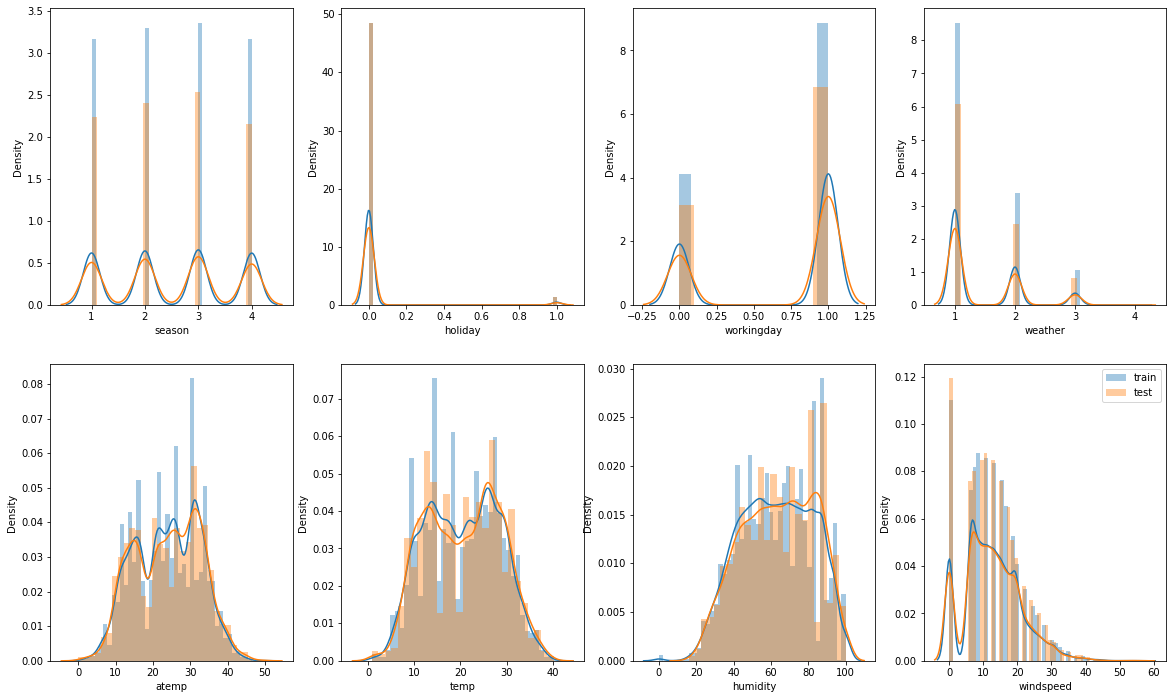

In [39]:
p, axes = plt.subplots(2,4, figsize=(20,12))

col_list = ['season', 'holiday', 'workingday', 'weather', 'atemp','temp', 'humidity',
       'windspeed']
for i, col in enumerate(col_list):
    r = i//4
    c = i%4
    sns.distplot(df[col], label="train", ax=axes[r][c])
    sns.distplot(test[col], label="test",  ax=axes[r][c])
    
plt.legend()
plt.show()


day: train(1 ~ 20), test(20 ~ 31) </br>
    - 학습에서 제외

In [ ]:
sns.countplot(train['day'])
sns.countplot(test['day'])

In [ ]:
p,axes = plt.subplots(3,2,figsize=(12,6))
#sns.countplot(data=df,x='year')
sns.barplot(x='year',y='count',data=df,ax=axes[0][0])
sns.barplot(x='month',y='count',data=df,ax=axes[0][1])
sns.barplot(x='day',y='count',data=df,ax=axes[1][0])
sns.barplot(x='hour',y='count',data=df,ax=axes[1][1])
sns.barplot(x='weekday',y='count',data=df,ax=axes[2][0])
plt.show()

* 주말 ~ 평일 : 차이 무의미하다
* 날씨 : 5월 ~ 10월
* 시간 : 7 ~ 9시 , 17 ~ 18시  --> 출퇴근,통학용 주로 이용될 듯 하다.

<pre>  
평일/휴일
    'holiday', 'workingday' 

계절
    'season', 'weather', 'temp', 'atemp', 'humidity', 'windspeed'

In [ ]:
mm=pd.DataFrame(df.groupby("month")["count"].mean()).reset_index()
ms=mm.sort_values(by='count',ascending=False)
sns.barplot(data=ms,x="month",y="count")
plt.show()

hh=pd.DataFrame(df.groupby(["hour","season"],sort=True)['count'].mean()).reset_index()
sns.pointplot(data=hh,x='hour',y='count',hue="season",join=True)
plt.show()

ww=pd.DataFrame(df.groupby(["hour","weekday"],sort=True)['count'].mean()).reset_index()
sns.pointplot(data=ww,x='hour',y='count',hue="weekday",join=True)
plt.show()

##### 'weather','temp','atemp','humidity','windspeed'

In [ ]:
fig,axes = plt.subplots(1,4,figsize=(12,5))
sns.set()
sns.regplot(x="temp", y="count", data=df,ax=axes[0])
sns.regplot(x="windspeed", y="count", data=df,ax=axes[1])
sns.regplot(x="humidity", y="count", data=df,ax=axes[2])
sns.regplot(x="weather",y="count",data=df,ax=axes[3])
plt.show()

In [ ]:
ww = df[['weather','temp','atemp','humidity','windspeed','count']].corr()
mask = np.array(ww)
mask[np.tril_indices_from(mask)] = False
sns.heatmap(ww,annot=True,mask=mask)
plt.show()

-  "atemp" and "temp" has got strong correlation with each other. so that one of them has to be dropped.</br>
- "weather" and "windspeed" have to be considered as they have got leak correlation one another. 

<pre>
* temp    - atemp     : 다중공선                 --> 피쳐 drop
* weather - count     : -0.13 별 관계가 없다      --> weather 4 아웃라이어 처리 안함
* weather - windspeed :  0.10 아무 관계도 아니다  --> 0 데이터 처리 

* weather - humidity  :  0.41 약한 상관관계

In [47]:
df.drop('atemp',axis=1,inplace=True)

##### casual,registered,count

In [ ]:
#casual + registerd = count 
#혹시나 해서 casual + registerd != count 찾아봤지만 없었다
df[df['casual']+df['registered']!=df['count']]

In [ ]:
df.drop(['casual','registered'],axis=1,inplace=True)

In [ ]:
##### 전체 heatmap

In [ ]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(),annot=True,fmt=".2f")

In [ ]:
## seanson과 month 둘 중 하나 버려도 된다 (다중공선이기 때문) > 학습 후 결정

### feature engineering

-'windspeed' feature 결측치 채우기
* weather - count     : -0.13 별 관계가 없다
* weather - windspeed :  0.10 아무 관계도 아니다


In [41]:
df['windspeed'].value_counts()  # 0: 1313건

0.0000     2180
8.9981     1738
11.0014    1695
12.9980    1657
7.0015     1617
15.0013    1513
6.0032     1425
16.9979    1295
19.0012    1048
19.9995     808
22.0028     602
23.9994     460
26.0027     381
27.9993     296
30.0026     176
31.0009     146
32.9975     112
35.0008      84
39.0007      44
36.9974      39
40.9973      23
43.0006      14
43.9989      11
46.0022       5
50.0021       2
56.9969       2
47.9988       2
54.0020       2
51.9987       1
55.9986       1
Name: windspeed, dtype: int64

In [42]:
df[df['windspeed']==0].shape,df[df['windspeed']==0].shape[0]/df.shape[0]

((2180, 14), 0.12543874791414927)

In [43]:
df[df['windspeed']!=0].shape

(15199, 14)

In [44]:
from sklearn.ensemble import RandomForestRegressor
col_list=['season','weather', 'temp', 'humidity','year', 'month', 'day', 'hour']

windspped_X_train = df[df['windspeed'] != .0][col_list]        #--9573 .. ~windspped
windspped_y_train = df[df['windspeed'] != .0]['windspeed']     #--9573 ..  windspped
windspped_X_test  = df[df['windspeed'] == .0][col_list] 
# windspped_y_test  = pred
print(windspped_y_train.shape, windspped_X_train.shape)
windspped_X_train.head()

windspped_model = RandomForestRegressor(n_estimators=100, random_state=1234)
windspped_model.fit(windspped_X_train, windspped_y_train)
windspped_pred = windspped_model.predict(windspped_X_test)           #--1313문제
print(windspped_pred[:5],  windspped_pred.shape)                     #--1313 예측답안갯수

#--1313건에 해당하는 0값을 windspped값을 pred    -->   windspped_y_test로 대체
#windspped_y_test['windspped']  = pred.reshape(-1,1)

# train[train['col']>0] = 5                    #error
df.loc[df['windspeed'] == .0 , 'windspeed'] = windspped_pred.reshape(-1,1)


(15199,) (15199, 8)
[9.541939 9.881897 9.991844 9.502141 8.862023] (2180,)


RandomForest를 활용하여 Windspeed값을 부여해보자
하나의 데이터를 Windspeed가 0인 그리고 0이 아닌 데이터프레임으로 분리하고
학습시킬 0이 아닌 데이터 프레임에서는 Windspeed만 담긴 Series와 이외의 학습시킬 column들의 데이터프레임으로 분리한다
학습 시킨 후에 Windspeed가 0인 데이터 프레임에서 학습시킨 컬럼과 같게 추출하여 결과 값을 부여받은 후,
Windspeed가 0인 데이터프레임에 Windspeed값을 부여한다.

In [ ]:
sns.scatterplot(x="windspeed", y="count", data=df)
plt.show()

In [ ]:
# 파생변수 , 스케일링 (정규화),왜도/첨도 확인, 이상치 등등 전처리 해야함b

로그 변환

season       -0.005416
holiday       5.638538
workingday   -0.785258
weather       1.228047
temp         -0.006021
humidity     -0.111287
windspeed     1.180493
count         1.242066
year         -0.010243
month        -0.009253
day           0.012429
hour         -0.010680
weekday      -0.009235
dtype: float64

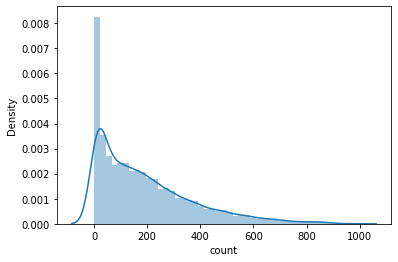

In [48]:
sns.distplot(df['count'])
df.skew()

In [ ]:
log=np.log1p(df['count'])
sns.distplot(log)

### 모델 

In [49]:
from sklearn.model_selection import train_test_split

train = df.iloc[:10886]
test=df.iloc[10886:]
test=test.drop(['count'],axis=1)

X=train.drop(['count'],axis=1)
y=train['count']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0,shuffle=False)
# 시계열성 데이터이기에 shuffle false

In [50]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

rf=RandomForestRegressor(random_state=0,n_estimators=100)
rf.fit(X_train,y_train)
pred=rf.predict(X_test)
rmse = mean_squared_error(y_test,pred,squared=False)
print(rmse)

72.90943385898838


In [51]:
from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error

xb=XGBClassifier(random_state=0,n_estimators=100)
xb.fit(X_train,y_train)
pred=xb.predict(X_test)
rmse = mean_squared_error(y_test,pred,squared=False)
print(rmse)

[16:54:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
153.08072676615552


In [52]:
from lightgbm import LGBMClassifier
from sklearn.metrics import mean_squared_error

xb=LGBMClassifier(random_state=0,n_estimators=100)
xb.fit(X_train,y_train)
pred=xb.predict(X_test)
rmse = mean_squared_error(y_test,pred,squared=False)
print(rmse)

334.21006395726835


In [ ]:
# 범주형: get_dummy(),onehotencoder()
# 연속형: 정규분포- 스케일링, 왜도/첨도- 로그변환

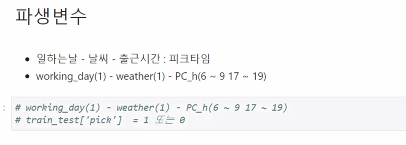

로그변환 후 스케일링

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(train[['temp','humidity','windspeed']])
scaler.transform(train[['temp','humidity','windspeed']])

#### 공모전 제출용

In [53]:
test_pred = xb.predict(test)

In [54]:
submission['count']=test_pred.reshape(-1,1)
submission.to_csv("02.csv",index=False)

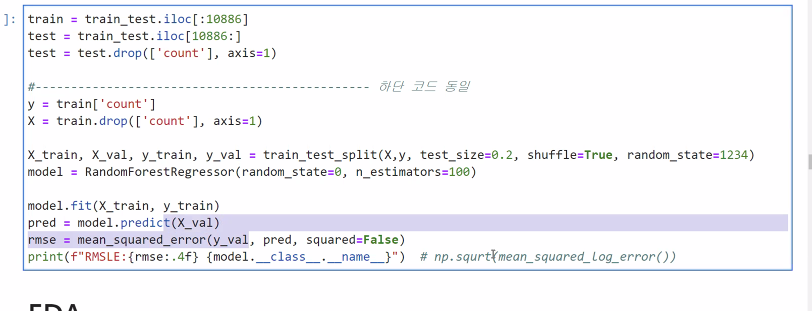
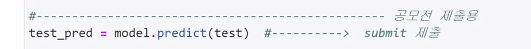
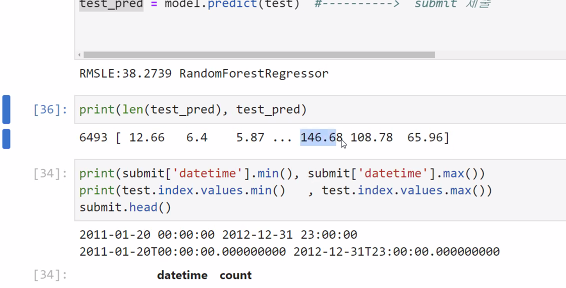
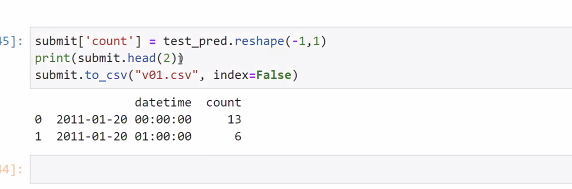
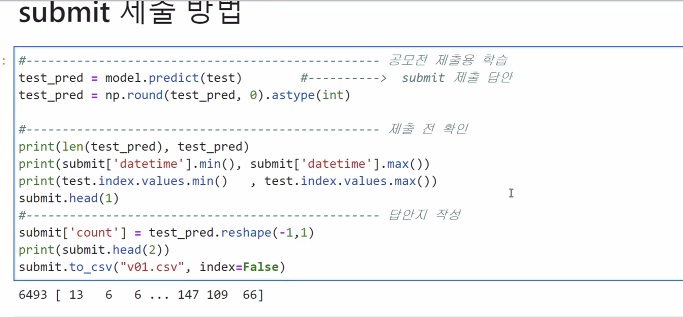